# Describing functions



The maxima and minima of a function are the largest and smallest value of the function.
If these values are the largest and smallest within a given range - these are the local maxima and minima of the function. If these values are the largest and smallest on the entire domain of a function - these are global maxima and minima of the function. 

<img src="../../Material-for-MLpython-course/GD_MSE/Maxima_and_Minima.png" alt="Drawing" style="width: 600px;"/>

We can also describe the shape of the function by finding derivative of the functions. [Derivative](https://en.wikipedia.org/wiki/Derivative) describes rate of the change of function respectively to change of its arument. Geometrically, **first derivative** of the function  can be interpreted as a **slope of the tangent line** at a certain point. The tangent line is the best linear approximation of the function near that input value ([see examples here](https://openstax.org/books/calculus-volume-1/pages/4-2-linear-approximations-and-differentials)).

The [tangent](https://en.wikipedia.org/wiki/Tangent) line to a plane curve at a given point is the straight line that "just touches" the curve at that point. It is the line through a pair of infinitely close points on the curve.

<img src="../../Material-for-MLpython-course/GD_MSE/tangent.jpg" alt="Drawing" style="width: 1000px;"/>

For function y = $f(x)$ derivative of the function with respect to x is commonly written as 	

$\frac{\huge dy}{\huge dx}\ \ \ $       or      $ \ \ \ \huge f'(x)$

The first derivative of the function is positive if the function is increasing and negative if it is decreasing.

![SegmentLocal](../../Material-for-MLpython-course/GD_MSE/Tangent_function_animation.gif "segment")

Moreover, when first derivative of the function at a point is zero (or the slope of the tangent line is zero) it indicates extrema (minimum or maximum of the function) at this point.

Therefore, to find the minimum or maximum of the function, we should find the argument where $f'(x) = 0$.
Note, that some functions might be continuous, but not differentiable at a certain interval or at any point ($f'(x)$ undefined) [link](https://openstax.org/books/calculus-volume-1/pages/4-5-derivatives-and-the-shape-of-a-graph).



<img src="../../Material-for-MLpython-course/GD_MSE/derivative2.jpeg" alt="Drawing" style="width: 600px;"/>

In addition, second derivative describes the rate of change of the first derivative  and therefore, the  curvature or concavity of the function (see more [here](https://openstax.org/books/calculus-volume-1/pages/4-5-derivatives-and-the-shape-of-a-graph) and [here](https://en.wikipedia.org/wiki/Second_derivative)).
From physics perspective the first derivative can be seen as an object velocity and the second derivative is acceleration. 

<img src="../../Material-for-MLpython-course/GD_MSE/derivative3.jpeg" alt="Drawing" style="width: 600px;"/>


# Find the minimum

The objective of many ML algorithms is to minimize loss function or find a global minimum of a loss function. There are variety of methods to find the minimum of the function. Let's take a look at some of them. 

introduce some iterative root-finding algorithms

### Gradient descent

GD of MSE loss function

**<center><font size="4">Differentiation rules</font></center>**

$\frac{\large d}{\large dx} \large (c) = 0$  
\
$\frac{\large d}{\large dx} \large (x) = 1$ 
\
\
$\frac{\large d}{\large dx} \large (cx) = c$ 
\
\
$\frac{\large d}{\large dx} \large (x^r) = rx^{r-1}$ 
\
\
$\frac{\large d}{\large dx} \large [f(g(x))] = f'(g(x))g'(x)$ 




MSE loss function for linear predictor $y = wx$

$$\mathcal{E} (\mathbf{w}) = (1/m) \sum^{m}_{i=1}(y^{(i)} - \hat{y}^{(i)})^2$$


$$\mathcal{E} (\mathbf{w}) = (1/m) \sum^{m}_{i=1}(y^{(i)} - \mathbf{w}^{T} \mathbf{x}^{(i)})^2$$


Let's consider a simplest case, where we have only 1 feature $x^{(i)}$ for $i$-th datapoint. The true label of this data point is $y^{(i)}$ and prediction is $\hat y^{(i)} = wx^{(i)}$, where $w$ is the weight. We will skip indices of the datapoints for better readability.

Squared prediction error for $i$-th data point $\mathcal{E}$: 

$$\large \mathcal{E} = (y - \hat y)^2$$

$$\large \mathcal{E} = (y - w x)^2$$

Now we want to estimate how the function (squared prediction errors $\mathcal{E}$) change respectively to the change of the weight. Therefore, we will take partial derivative of $\mathcal{E}$ with respect to $w$. This means, that we will treat $y$ and $x$ as a constants (read more [here](https://www.mathsisfun.com/calculus/derivatives-partial.html) about partial derivatives).

Apply chain and power rules:

$$\frac{\large \partial}{\large \partial w} \large \mathcal{E} = ((y - {w}{x})^2)'(y - {w}{x})' =$$ 

$$\large = 2(y - {w}{x})(0 - x) =$$

$$\large = -2x(y - {w}{x})$$



include partial der of bias

deriivative and summation

Illustrate with pic

Introduce gradient

Introduce plain GD algorithm

### Minibatch and stochastic gradient descent

Batch size = number of datapoints (100)
![SegmentLocal](../../Material-for-MLpython-course/GD_MSE/minibatchGD1.gif "segment")
Batch size = 5% of total number of datapoints (5)
![SegmentLocal](../../Material-for-MLpython-course/GD_MSE/minibatchGD2_2.gif "segment")

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.datasets import make_regression 

# generate some synthetic dataset
np.random.seed(42)
X =  np.random.randint(0,100,(100,1))
y =  (3*X[:,0]+np.random.randint(50,300,100)).reshape(-1,1)

# create Linear Regression model using an intercept term 
reg_intercept = linear_model.LinearRegression(fit_intercept=True) 
# fit a linear regression model (with intercept)
reg_intercept = reg_intercept.fit(X, y)

# idealw = reg_intercept.coef_
# idealb = reg_intercept.intercept_
# idealMSE = np.mean((y - (idealw*X+idealb))**2)

In [2]:
def batch(X,y,batchSize):
    for i in range(0,X.shape[0],batchSize):
        yield (X[i:i + batchSize], y[i:i + batchSize])

In [3]:
def grad_descent(X,y,weights,bias,lrate):
    
    # number of features n
    # number of datapoints m
    n = X.shape[1]
    m = X.shape[0]

    # Performing Gradient Descent  

    y_hat     = np.dot(X, weights)+bias  # The current predicted value of y  
    der_w     = (-2/m)*np.dot(X.T,(y - y_hat))  # Derivative of MSE Loss function wrt w
    der_bias  = (-2/m)*sum(y - y_hat)          # Derivative of MSE Loss function wrt bias 
    weights   = weights - lrate* der_w           # Update weight
    bias      = bias - lrate* der_bias           # Update intercept/bias

    MSE = np.mean((y - y_hat)**2)
 
    return weights, bias, MSE 

In [4]:
def minibatchGD(X,y,batchSize,epoches, lrate):  
    
    weights    = np.zeros((X.shape[1],1))
    bias       = np.zeros((1,1))
    
    loss       = []
    batch_loss = []

    for i in range(epoches):
        for X_batch,y_batch in batch(X,y,batchSize):
            weights, bias, MSE = grad_descent(X_batch,y_batch,weights,bias,lrate)
            batch_loss.append(MSE)

        loss.append(np.mean(batch_loss))
    return weights, bias, loss, batch_loss     

In [5]:
# batch size 1
model1 = minibatchGD(X,y,1,2000,0.0001)

In [6]:
# batch size 10
model2 = minibatchGD(X,y,10,2000,0.0001)

In [7]:
# batch size 100
model3 = minibatchGD(X,y,100,2000,0.0001)

In [8]:
batch_loss1 = model1[-1]
batch_loss2 = model2[-1]
batch_loss3 = model3[-1]

print(len(batch_loss1), len(batch_loss2), len(batch_loss3))

200000 20000 2000


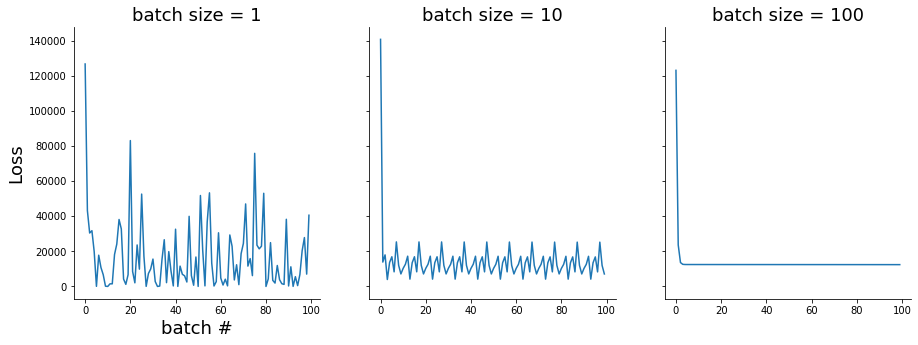

In [9]:
fig, axes = plt.subplots(1,3, sharey=True, figsize=(15,5))
axes[0].plot(np.arange(len(batch_loss1[:100])), batch_loss1[:100])
axes[1].plot(np.arange(len(batch_loss2[:100])), batch_loss2[:100])
axes[2].plot(np.arange(len(batch_loss3[:100])), batch_loss3[:100])

axes[0].set_xlabel('batch #', fontsize=18)
axes[0].set_ylabel('Loss', fontsize=18)

axes[0].set_title("batch size = 1", fontsize=18)
axes[1].set_title("batch size = 10", fontsize=18)
axes[2].set_title("batch size = 100", fontsize=18)

for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.show()